In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [38]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
print X[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [15]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
# Compute clustering with Means
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [73]:
import numpy as np
from sklearn.cluster import KMeans
k_means_labels = k_means.labels_
print k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
print k_means_cluster_centers
k_means_labels_unique = np.unique(k_means_labels)
print k_means_labels_unique

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
[0 1 2]


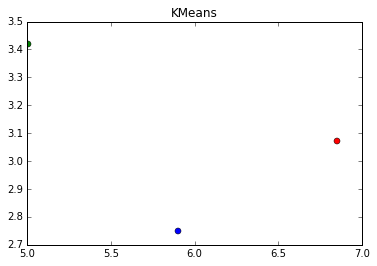

In [74]:
import pylab as pl
fig = pl.figure(1)
for center in k_means_cluster_centers:
    pl.plot(center[0], center[1], 'o')
pl.title('KMeans')
pl.show()

In [75]:
print range(3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
print colors
print zip(range(3), colors)
for k, col in zip(range(3), colors):
    print k, col

[0, 1, 2]
['#4EACC5', '#FF9C34', '#4E9A06']
[(0, '#4EACC5'), (1, '#FF9C34'), (2, '#4E9A06')]
0 #4EACC5
1 #FF9C34
2 #4E9A06


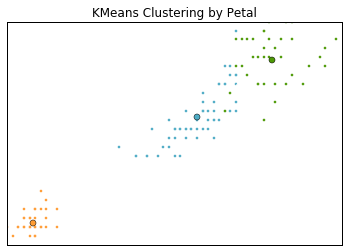

In [76]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 2], X[my_members, 3], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[2], cluster_center[3], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering by Petal')
pl.xticks(())
pl.yticks(())
pl.show()

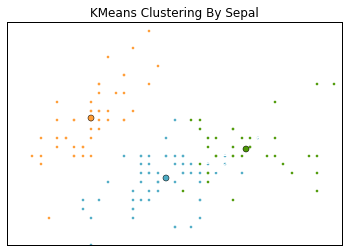

In [77]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering By Sepal')
pl.xticks(())
pl.yticks(())
pl.show()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, k_means_labels)
print( "The average silhouette_score is :", silhouette_avg)

('The average silhouette_score is :', 0.5525919445213674)


In [57]:
c = cluster.KMeans(n_clusters=3)
k_data = c.fit_predict(X)
print c.inertia_

78.9408414261


In [60]:
wcss = []
for i in range(2,20):
    c = KMeans(n_clusters=i)
    k_data = c.fit_predict(X)
    wcss.append((i, c.inertia_))
    print i, c.inertia_

2 152.368706477
3 78.9408414261
4 57.3178732143
5 46.5355820513
6 38.9309630497
7 34.1906879248
8 30.274954264
9 27.8410735931
10 25.9585735931
11 24.7612567783
12 23.1101792192
13 21.6783484848
14 20.4098703323
15 18.7961897269
16 18.1221918914
17 16.8878030303
18 16.1835357143
19 15.5776092437


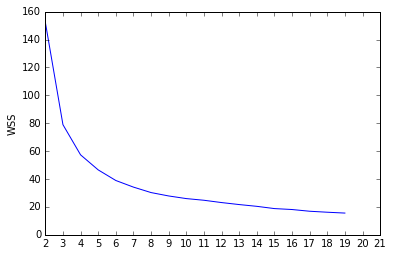

In [71]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in wcss ]
plt.plot(plotary)
plt.ylabel('WSS')
plt.xticks(range(0,20), range(2,22))
plt.show()

In [63]:
silhouette_ary = []
for i in range(2,20):
    c = KMeans(n_clusters=i)
    c.fit(X)
    k_means_labels = c.labels_
    silhouette_avg = silhouette_score(X, k_means_labels)
    silhouette_ary.append((i, silhouette_avg))
    print i, silhouette_avg

2 0.680813620271
3 0.552591944521
4 0.497825690075
5 0.488517550854
6 0.368205696538
7 0.350875960341
8 0.357270349229
9 0.34288338431
10 0.298394015303
11 0.305308975761
12 0.291321954568
13 0.294777021566
14 0.28691681532
15 0.300306027584
16 0.309270699803
17 0.277341341915
18 0.279899807253
19 0.281839927149


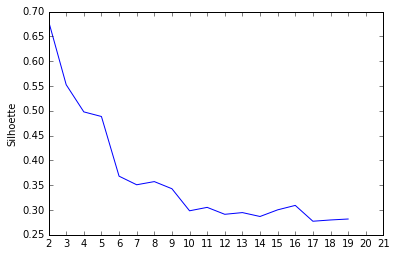

In [70]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in silhouette_ary]
plt.plot(plotary)
plt.ylabel('Silhoette')
plt.xticks(range(0,20), range(2,22))
plt.show()

In [78]:
print X[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=True)

In [89]:
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

Reduced dataset shape: (150L, 2L)


In [90]:
print X_reduced[0:10]

[[-1.31027769 -0.665813  ]
 [-1.32549971  0.34565409]
 [-1.41064601  0.27998911]
 [-1.34065489  0.63424977]
 [-1.33194435 -0.68072975]
 [-1.1129166  -1.52440999]
 [-1.37699885  0.16737608]
 [-1.28209956 -0.34738382]
 [-1.40973759  1.1636137 ]
 [-1.30521934  0.21749888]]


Meaning of the 2 components:


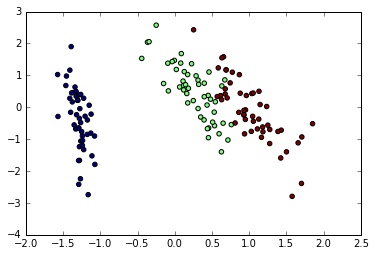

In [91]:
import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
print "Meaning of the 2 components:"


In [92]:
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


In [103]:
5.1 * 0.362 - 0.082 * 3.5 + 1.4 * 0.857 + 0.2 *0.359 

2.8307999999999995

In [102]:
#print pca.components_[0]
#for rec in X:
#    print sum(rec * pca.components_[0])
for ele in zip(X,X_reduced)[0:10]:
    print ele

(array([ 5.1,  3.5,  1.4,  0.2]), array([-1.31027769, -0.665813  ]))
(array([ 4.9,  3. ,  1.4,  0.2]), array([-1.32549971,  0.34565409]))
(array([ 4.7,  3.2,  1.3,  0.2]), array([-1.41064601,  0.27998911]))
(array([ 4.6,  3.1,  1.5,  0.2]), array([-1.34065489,  0.63424977]))
(array([ 5. ,  3.6,  1.4,  0.2]), array([-1.33194435, -0.68072975]))
(array([ 5.4,  3.9,  1.7,  0.4]), array([-1.1129166 , -1.52440999]))
(array([ 4.6,  3.4,  1.4,  0.3]), array([-1.37699885,  0.16737608]))
(array([ 5. ,  3.4,  1.5,  0.2]), array([-1.28209956, -0.34738382]))
(array([ 4.4,  2.9,  1.4,  0.2]), array([-1.40973759,  1.1636137 ]))
(array([ 4.9,  3.1,  1.5,  0.1]), array([-1.30521934,  0.21749888]))
